In [4]:
import numpy as np
import matplotlib.pyplot as plt 

In [15]:
def Linear_Congruential_Generator(seed, multipler, increment, modulus, num_samples):
    x = seed
    sequence = np.empty(num_samples, dtype=np.uint32 if modulus <= 2**32 else np.uint64)
    
    for i in range(num_samples):
        x = (multipler * x + increment) % modulus
        sequence[i] = x
    return sequence.tolist()




In [16]:
# TODO: ensure at least one parameter set satisfies the Hull-Dobell Theorem and demonstrates a full-period LCG
modulus = 2**32
multiplier = 1664525
increment = 1013904223
seed = 512

print(f"Using LCG parameters satisfying Hull-Dobell for full period:")
print(f"Modulus (m): {modulus}")
print(f"Multiplier (a): {multiplier}")
print(f"Increment (c): {increment}")
print(f"Seed (X_0): {seed}")

Using LCG parameters satisfying Hull-Dobell for full period:
Modulus (m): 4294967296
Multiplier (a): 1664525
Increment (c): 1013904223
Seed (X_0): 512


In [17]:
# TODO: run your generator for at least 10e6 steps

num_samples_to_generate = 1_000_000 

print(f"Generating {num_samples_to_generate} samples using the LCG...")
lcg_numbers = Linear_Congruential_Generator(seed, multiplier, increment, modulus, num_samples_to_generate)
print("Generation complete.")

Generating 1000000 samples using the LCG...
Generation complete.


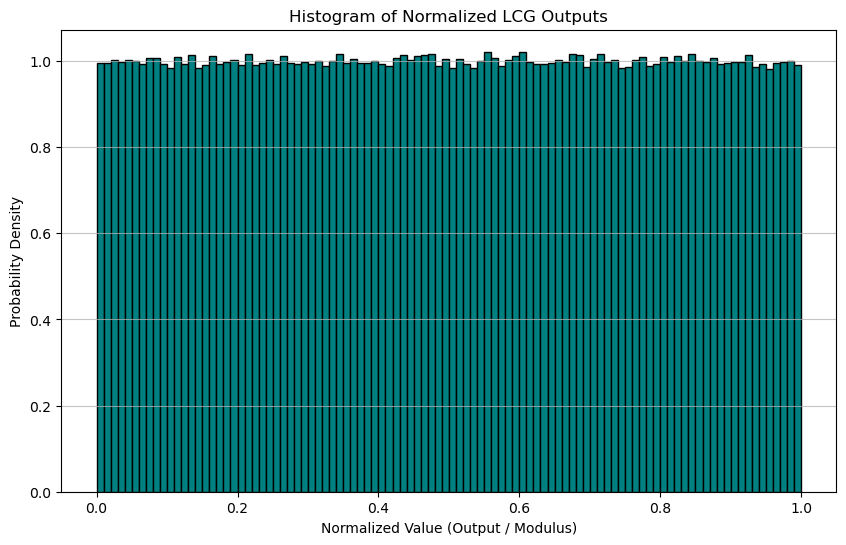

In [19]:
# TODO: plot a histogram of the generated numbers to visualize distribution

normalized_lcg_numbers = np.array(lcg_numbers) / modulus

plt.figure(figsize=(10, 6))
plt.hist(normalized_lcg_numbers, bins=100, density=True, color='teal', edgecolor='black')
plt.title('Histogram of Normalized LCG Outputs')
plt.xlabel('Normalized Value (Output / Modulus)')
plt.ylabel('Probability Density')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [1]:
def compute_entropy(X, num_bins=256, entropy_type='shannon'):
    if len(X) == 0:
        return 0
    hist, _ = np.histogram(X, bins=num_entropy_bins, range=(0, 1), density=False) 

    total_counts = np.sum(hist)
    if total_counts == 0:
        return 0 
    probabilities = hist / total_counts

    if entropy_type == 'shannon':
        entropy = 0
        for p in probabilities:
            if p > 0: 
                entropy -= p * math.log2(p)
        return entropy
    elif entropy_type == 'min':
        max_prob = np.max(probabilities)
        if max_prob > 0:
            return -math.log2(max_prob)
        else:
            return 0 
    else:
        print(f"Warning: Unknown entropy type '{entropy_type}'. Returning 0.")
        return 0
    

In [21]:
interval_size = 1000
num_intervals = num_samples_to_generate // interval_size

shannon_entropies = []
min_entropies = []
sample_counts = []

num_entropy_bins = 256

print(f"Calculating entropy for {num_intervals} intervals, each covering {interval_size} samples...")


Calculating entropy for 1000 intervals, each covering 1000 samples...
